In [1]:
# Import necessary library:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D ,MaxPooling2D, Flatten, Dense, Softmax, ReLU, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.losses import SparseCategoricalCrossentropy, CategoricalCrossentropy
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [2]:
# Load the Fashion-MNIST dataset:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

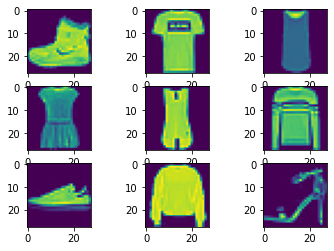

In [3]:
# Plot first few images:
for i in range(9):
	plt.subplot(330 + 1 + i)
	plt.imshow(train_images[i])
plt.show()

In [4]:
# Print the shape of the training images, training labels, testing images, testing labels:
print('train_images shape: ',train_images.shape)
print('train_labels shape: ',train_labels.shape)
print('test_images shape: ',test_images.shape)
print('test_labels shape: ',test_labels.shape)

train_images shape:  (60000, 28, 28)
train_labels shape:  (60000,)
test_images shape:  (10000, 28, 28)
test_labels shape:  (10000,)


In [5]:
# Reshape training images and testing images:
train_images = np.expand_dims(train_images, axis=-1)
test_images = np.expand_dims(test_images, axis=-1)

In [6]:
# Print the shape of the training images and testing images after reshape:
print('train_images shape: ',train_images.shape)
print('train_labels shape: ',train_labels.shape)
print('test_images shape: ',test_images.shape)
print('test_labels shape: ',test_labels.shape)

train_images shape:  (60000, 28, 28, 1)
train_labels shape:  (60000,)
test_images shape:  (10000, 28, 28, 1)
test_labels shape:  (10000,)


In [7]:
# Rescale the image values so that they lie in between 0 and 1:
train_images = train_images / 255.
test_images = test_images / 255.

In [8]:
# Defining labels in our dataset
labels = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]

In [9]:
# Build the Sequential convolutional neural network model:
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(64, (3,3), activation='relu',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128, (3,3), activation='relu',padding='same'))
model.add(Dropout(0.6))
model.add(Flatten())
model.add(Dropout(0.6))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, 'softmax'))

In [10]:
# Print the model summary:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 13, 13, 128)       73856     
                                                                 
 dropout (Dropout)           (None, 13, 13, 128)       0         
                                                                 
 flatten (Flatten)           (None, 21632)             0         
                                                        

In [11]:
# Compile model:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [24]:
# Fit data to model:
# his = model.fit(train_images, train_labels, epochs=30, batch_size=32, shuffle=True, validation_split=0.1)

Epoch 1/30
1688/1688 [==============================] - 287s 169ms/step - loss: 0.4751 - accuracy: 0.8285 - val_loss: 0.3225 - val_accuracy: 0.8832
Epoch 2/30
1688/1688 [==============================] - 285s 169ms/step - loss: 0.3273 - accuracy: 0.8791 - val_loss: 0.2623 - val_accuracy: 0.9022
Epoch 3/30
1688/1688 [==============================] - 281s 166ms/step - loss: 0.2845 - accuracy: 0.8960 - val_loss: 0.2393 - val_accuracy: 0.9122
Epoch 4/30
1688/1688 [==============================] - 280s 166ms/step - loss: 0.2608 - accuracy: 0.9044 - val_loss: 0.2257 - val_accuracy: 0.9173
Epoch 5/30
1688/1688 [==============================] - 280s 166ms/step - loss: 0.2429 - accuracy: 0.9101 - val_loss: 0.2183 - val_accuracy: 0.9215
Epoch 6/30
1688/1688 [==============================] - 284s 168ms/step - loss: 0.2314 - accuracy: 0.9133 - val_loss: 0.2156 - val_accuracy: 0.9192
Epoch 7/30
1688/1688 [==============================] - 282s 167ms/step - loss: 0.2200 - accuracy: 0.9174 - val_

In [13]:
# Model evevaluate:
Test_loss, Test_accuracy = model.evaluate(test_images, test_labels)

313/313 [==============================] - 3s 8ms/step - loss: 0.2077 - accuracy: 0.9320


In [14]:
# Test Accurcy and Test Loss:
print('Test accuracy:', Test_accuracy)
print('Test loss:', Test_loss)

Test accuracy: 0.9319999814033508
Test loss: 0.20766715705394745


In [15]:
# Read saved history:
import json,codecs
with codecs.open('model_history.json', 'r', encoding='utf-8') as file:
    history = json.loads(file.read()) 

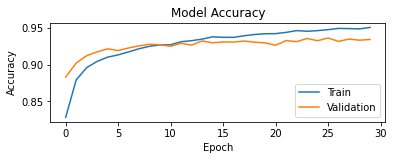

In [16]:
# Plot accuracy in train and validation:
plt.subplot(2,1,1)
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')

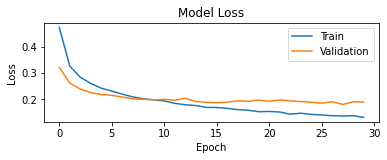

In [17]:
# Plot loss in train and validation:
plt.subplot(2,1,1)
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

In [ ]:
# Save model:
# model.save('Fashion_MNIST_Model.h5')

In [12]:
# Load model:
model = load_model('Fashion_MNIST_Model.h5')

In [18]:
# Photo Processing:
t_shirt = load_img('./T-Shirt.jpg', target_size=(28,28))
t_shirt = tf.image.rgb_to_grayscale(t_shirt)
t_shirt = img_to_array(t_shirt)[np.newaxis,...]
t_shirt = t_shirt /255.0

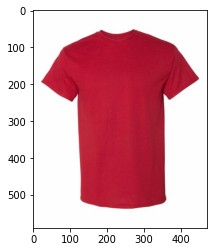

In [19]:
# Test our model:
t_shirt_image = load_img('./T-Shirt.jpg')
plt.imshow(t_shirt_image)

In [20]:
# Make prediction:
predictions = model.predict(t_shirt)
print('This is',labels[np.argmax(predictions)])

This is T-shirt/top
